### 딥러닝 모델로 분류하기

#### 데이터 가져오기, 머신러닝 복습

In [2]:
# 로컬 파일에서 데이터 가져오기

import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("../wine.csv")

print(df.head())  # 데이터 확인

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


In [ ]:
# 데이터 train, test 나누기

from sklearn.model_selection import train_test_split  # 데이터 분할 함수
from sklearn.preprocessing import StandardScaler  # 데이터 표준화 함수

# [데이터 제작]
X = df.drop(columns=["Wine"])
y = df["Wine"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # test_size: 전체 데이터 중 test에 할당할 비율


In [ ]:
# 데이터로 머신러닝 분류 모델 학습, 평가

from sklearn.metrics import accuracy_score  # 정확도 평가 함수

# [DT 모델]
from sklearn.tree import DecisionTreeClassifier

# 모델 생성, 훈련
dt_model = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=3, max_depth=3, random_state=42)
    # **max_depth=3: 트리의 최대 깊이를 3으로 제한. 깊이가 줄어든 만큼 조건을 덜 체크하므로 정확도 하락 but 과적합 감소
    # **min_samples_spilt=5: 한 노드에서 샘플이 최소 5개여야만 다음 노드로 넘어감(= 샘플을 나눔). 정확도 하락 but 과적합 감소
    # **min_samples_leaf=2: 최하단 노드(잎)는 샘플이 최소 2개 있어야 함. 샘플을 너무 작게 나누는 걸 방지해 정확도 하락 but 과적합 감소
dt_model.fit(X_train, y_train)

# 모델 예측, 평가
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"DT 테스트 정확도: {accuracy:.2f}")

# [RF 모델]
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
    # n_estimators=100: DT 모델을 100개 사용. 많으면 성능 향상 but 계산량 증가
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"RF 테스트 정확도: {accuracy:.2f}")


# [SVM 모델]
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf", C=10, random_state=42)
    # C: 마진. C가 작을수록 마진이 커지고, 마진이 클수록 훈련 데이터에 맞아져 과적합 가능성 증가
    # kernel="linear": 커널 종류가 선형. 자료들을 나누는 구분선 형태를 선형/비선형(곡선 등) 등에서 하나를 선택하는 것. rbf, poly, sigmoid 등 다양함.

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM 테스트 정확도: {accuracy:.2f}")


# [LR 모델]
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')
    # multi_class='ovr': 다중 분류를 할 때, 여러 다중 분류 방법 중 하나(ovr은 One-vs-Rest 방식)를 선택. 이진 분류는 True/False만 분류하고, 다중 분류는 3개 이상의 종류를 분류하는 것
    # ovr: 여러 종류를 '현재 종류 vs 나머지 종류'식으로 여러 개의 이진 문제로 바꿈.
    # multinomial(소프트맥스): 모든 종류에 대해 확률을 계산한 뒤, 가장 높은 확률의 종류로 예측.
    # 현재 multi_class='ovr'을 넣으면 경고가 발생해서 제거해 둠
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"LR 테스트 정확도: {accuracy:.2f}")


# [KNN 모델]
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5로 설정
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN 테스트 정확도: {accuracy:.2f}")

DT 테스트 정확도: 0.94
RF 테스트 정확도: 0.97
SVM 테스트 정확도: 1.00
LR 테스트 정확도: 1.00
KNN 테스트 정확도: 0.94


#### 딥러닝 시작

In [46]:
# 원-핫 인코딩, 딥러닝 입력을 위해 Numpy로 변환

Y = pd.get_dummies(y).values # 원-핫 인코딩
    # pd.get_dummies(y): y의 각 클래스를 원-핫 벡터로 변환
    # .values: DataFrame을 Numpy 배열로 변환
print(Y[:5])

# X = X.values # 딥러닝 입력을 위해 Numpy로 변환(but X는 이미 Numpy 배열이기 때문에 변환할 필요 없음)
    # scaler = StandardScaler()
    # X = scaler.fit_transform(X)
    # 이 두 줄 코드에서 StandardScaler()가 X를 Numpy로 이미 변환시켰음
print(X[:5])

[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]
[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]


In [47]:
# train, test 분리

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((142, 13), (142, 3), (36, 13), (36, 3))

손실함수

- Binary Crossentropy

이 손실 함수는 이진 분류 문제(binary classification)에 사용됩니다. 여기서 모델은 단 두 개의 클래스 중 하나를 예측해야 합니다. 보통 시그모이드 활성화 함수(sigmoid activation function)를 출력 계층에 사용합니다. 이 함수는 0과 1 사이의 값을 반환하여, 각 클래스에 속할 확률을 나타냅니다.

- Categorical Crossentropy

다중 클래스 분류 문제(multi-class classification)에 사용됩니다. 모델은 두 개 이상의 클래스 중 하나를 예측해야 합니다 소프트맥스 활성화 함수(softmax activation function)가 일반적으로 사용됩니다. 이 함수는 모든 클래스에 대해 확률 분포를 반환하여, 각 클래스에 속할 확률을 나타냅니다.

In [85]:
# 모델 정의하기(만들기), 하이퍼파라미터 튜닝

from keras.models import Sequential # 신경망 모델: 층을 순차적으로 쌓는 방식
from keras.layers import Dense # 완전 연결 레이어
from keras.optimizers import SGD,Adam # 최적화 알고리즘

# (하이퍼파라미터)튜닝
# 1. 각 레이어의 activation 함수로 relu, sigmoid, softmax 3개를 섞어 쓸 수 있음
# 2. 모델의 Dense(a, ...)의 a를 늘렸다 줄일 수도, 늘리기만 할 수도, 왔다갔다 할 수도 있음
# 3. add 함수를 여러 개 넣어서 레이어 수를 늘리거나 반대로 add 함수를 빼서 줄일 수도 있음
# * 마지막 add(레이어)는 바꾸면 안 됨! 모델마다 Last-Layer Activation과 Loss Function(compile(..., 'binary_crossentropy', ...) 이 부분)은 고정임

model = Sequential()

model.add(Dense(10,input_shape=(13,),activation='relu')) # 입력층
    # input_shape=(,13): 데이터의 특성 개수가 13개
    # Dense(10, ...): 이 층이 출력으로 뽑는 노드(특성)가 10개
model.add(Dense(8,activation='relu')) # 은닉층
model.add(Dense(6,activation='relu')) # 은닉층
model.add(Dense(3,activation='softmax')) # 출력층
    # 출력층 노드가 a개: a개의 답 중 하나를 분류하는 문제라는 의미
    # 지금 입력하려는 와인 데이터는 클래스가 3개이므로 출력층 노드는 3개여야 함

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])
    # Adam(): 최적화 알고리즘. 딥러닝에서 가장 많이 쓰임.
    #   ㄴ learning_rate: 학습률. 가중치 업데이트 시 변화량 조절.
    # 'binary_crossentropy': 손실 함수 - 모델이 얼마나 틀렸는지 측정. 2중이 아닌 다중 클래스 분류라면 categorical_crossentropy를 써야 함.
    # metrics=['accuracy']: 평가 지표로 accuracy(정확도) 사용.
    
    # *learning_rate 대신 lr을 사용하면 오류: 최신 버전은 learning_rate 속성만 지원
model.summary()
    # 출력으로 나오는 Params: 파라미터. AI 모델의 내부 변수. 이 변수에 의해 입력값이 원하는 출력값으로 만들어 짐. 가중치(w)와 비슷한 것.

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

import numpy as np

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.4941 - loss: 1.0639 - val_accuracy: 0.7778 - val_loss: 0.5673
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7961 - loss: 0.4601 - val_accuracy: 0.8056 - val_loss: 0.3375
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8832 - loss: 0.2396 - val_accuracy: 0.9444 - val_loss: 0.1059
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9700 - loss: 0.0812 - val_accuracy: 1.0000 - val_loss: 0.0194
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9830 - loss: 0.0380 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9830 - loss: 0.0292 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9946 - loss: 0.0210 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9964 - loss: 0.0113 - val_accuracy: 1.0000 - val_loss: 0.0017


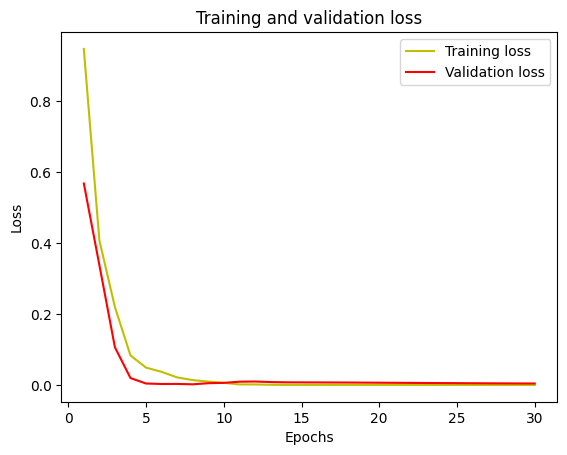

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

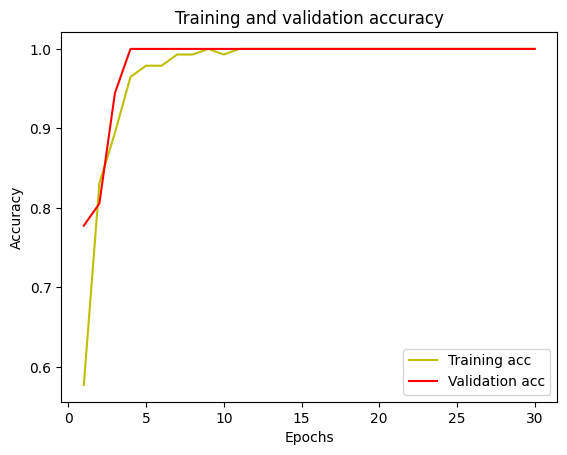

In [88]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [89]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
